In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [296]:
def read_data(path='clinical.tsv'):
    df = pd.read_csv(path, sep='\t')
    columns=df.columns
    rows=len(df)
    for column in columns:
        if (df[column]=="'--").sum() == rows:
          df.drop(columns=[column], inplace=True)
          continue
        df[column]=df[column].replace("'--", df[column].max())

    display(df.head())
    display(df.apply(lambda col: col.value_counts().head(), axis=0))
    display(df.info())
    display(df.describe())
    print('duplicated=', df.duplicated().sum())
    return df

df_clinical = read_data()

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,classification_of_tumor,days_to_diagnosis,days_to_last_follow_up,icd_10_code,last_known_disease_status,morphology,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,2012,22454,No,Stage I,No,not reported,0,22,C48.1,not reported,9680/3,"Malignant lymphoma, large B-cell, diffuse, NOS",no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,2012,22454,No,Stage I,No,not reported,0,22,C48.1,not reported,9680/3,"Malignant lymphoma, large B-cell, diffuse, NOS",no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,2012,27025,No,Stage IV,No,not reported,0,6,C83.3,not reported,9680/3,"Malignant lymphoma, large B-cell, diffuse, NOS",no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,2012,27025,No,Stage IV,No,not reported,0,6,C83.3,not reported,9680/3,"Malignant lymphoma, large B-cell, diffuse, NOS",no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,-10075,391,hispanic or latino,female,white,Dead,1984,2012,10075,No,Stage II,No,not reported,0,982,C83.3,not reported,9680/3,"Malignant lymphoma, large B-cell, diffuse, NOS",no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,yes,"Pharmaceutical Therapy, NOS"


,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,classification_of_tumor,days_to_diagnosis,days_to_last_follow_up,icd_10_code,last_known_disease_status,morphology,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
-10075,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-21959,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-22454,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-27025,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-8493,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN
not hispanic or latino,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
not reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,106.0,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,106.0,NaN,2.0,NaN
white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case_id                           106 non-null    object
 1   case_submitter_id                 106 non-null    object
 2   project_id                        106 non-null    object
 3   age_at_index                      106 non-null    object
 4   days_to_birth                     106 non-null    object
 5   days_to_death                     106 non-null    object
 6   ethnicity                         106 non-null    object
 7   gender                            106 non-null    object
 8   race                              106 non-null    object
 9   vital_status                      106 non-null    object
 10  year_of_birth                     106 non-null    object
 11  year_of_death                     106 non-null    object
 12  age_at_diagnosis      

None

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,classification_of_tumor,days_to_diagnosis,days_to_last_follow_up,icd_10_code,last_known_disease_status,morphology,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
count,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
unique,58,58,1,34,48,9,2,2,3,2,34,4,48,2,4,2,1,1,41,10,1,1,1,1,2,1,20,1,20,1,14,3,2
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,82,-8493,708,not hispanic or latino,male,white,Alive,1987,2012,8493,No,Stage IV,Yes,not reported,0,982,C83.3,not reported,9680/3,"Malignant lymphoma, large B-cell, diffuse, NOS",no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,yes,"Radiation Therapy, NOS"
freq,2,2,106,12,12,90,82,54,68,78,12,100,12,70,46,56,106,106,22,86,106,106,106,106,94,106,32,106,32,106,28,61,58


duplicated= 0


In [297]:
df_exposure = read_data('exposure.tsv')

,case_id,case_submitter_id,project_id,alcohol_history
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,Not Reported
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,Not Reported
2,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,Not Reported
3,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,Not Reported
4,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,Not Reported


,case_id,case_submitter_id,project_id,alcohol_history
0030a28c-81aa-44b0-8be0-b35e1dcbf98c,1.0,NaN,NaN,NaN
0bf573ac-cd1e-42d8-90cf-b30d7b08679c,1.0,NaN,NaN,NaN
0e251c03-bf86-4ed8-b45d-3cbc97160502,1.0,NaN,NaN,NaN
0e9fcccc-0630-408d-a121-2c6413824cb7,1.0,NaN,NaN,NaN
1843c82e-7a35-474f-9f79-c0a9af9aa09c,1.0,NaN,NaN,NaN
Not Reported,NaN,NaN,NaN,48.0
TCGA-DLBC,NaN,NaN,48.0,NaN
TCGA-FA-A4BB,NaN,1.0,NaN,NaN
TCGA-FA-A6HN,NaN,1.0,NaN,NaN
TCGA-FA-A7Q1,NaN,1.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case_id            48 non-null     object
 1   case_submitter_id  48 non-null     object
 2   project_id         48 non-null     object
 3   alcohol_history    48 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


None

,case_id,case_submitter_id,project_id,alcohol_history
count,48,48,48,48
unique,48,48,1,1
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,Not Reported
freq,1,1,48,48


duplicated= 0


In [298]:

pd.read_csv('family_history.tsv', sep='\t').head()

,case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_with_cancer_history,relatives_with_cancer_history_count


In [299]:
pd.read_csv('follow_up.tsv', sep='\t').head()

,case_id,case_submitter_id,project_id,adverse_event,adverse_event_grade,aids_risk_factors,barretts_esophagus_goblet_cells_present,bmi,body_surface_area,cause_of_response,cd4_count,cdc_hiv_risk_factors,comorbidity,comorbidity_method_of_diagnosis,days_to_adverse_event,days_to_comorbidity,days_to_follow_up,days_to_imaging,days_to_progression,days_to_progression_free,days_to_recurrence,diabetes_treatment_type,disease_response,dlco_ref_predictive_percent,ecog_performance_status,evidence_of_recurrence_type,eye_color,fev1_fvc_post_bronch_percent,fev1_fvc_pre_bronch_percent,fev1_ref_post_bronch_percent,fev1_ref_pre_bronch_percent,follow_up_id,follow_up_submitter_id,haart_treatment_indicator,height,hepatitis_sustained_virological_response,history_of_tumor,history_of_tumor_type,hiv_viral_load,hormonal_contraceptive_type,hormonal_contraceptive_use,hormone_replacement_therapy_type,hpv_positive_type,hysterectomy_margins_involved,hysterectomy_type,imaging_result,imaging_type,immunosuppressive_treatment_type,karnofsky_performance_status,menopause_status,nadir_cd4_count,pancreatitis_onset_year,pregnancy_outcome,procedures_performed,progression_or_recurrence,progression_or_recurrence_anatomic_site,progression_or_recurrence_type,recist_targeted_regions_number,recist_targeted_regions_sum,reflux_treatment_type,risk_factor,risk_factor_treatment,scan_tracer_used,undescended_testis_corrected,undescended_testis_corrected_age,undescended_testis_corrected_laterality,undescended_testis_corrected_method,undescended_testis_history,undescended_testis_history_laterality,viral_hepatitis_serologies,weight,aa_change,antigen,biospecimen_type,biospecimen_volume,blood_test_normal_range_lower,blood_test_normal_range_upper,cell_count,chromosome,clonality,copy_number,cytoband,days_to_test,exon,gene_symbol,histone_family,histone_variant,intron,laboratory_test,loci_abnormal_count,loci_count,locus,mismatch_repair_mutation,mitotic_count,mitotic_total_area,molecular_analysis_method,molecular_consequence,molecular_test_id,molecular_test_submitter_id,pathogenicity,ploidy,second_exon,second_gene_symbol,specialized_molecular_test,test_analyte_type,test_result,test_units,test_value,transcript,variant_origin,variant_type,zygosity


In [300]:
pd.read_csv('pathology_detail.tsv', sep='\t').head()


,case_id,case_submitter_id,project_id,diagnosis_id,diagnosis_submitter_id,additional_pathology_findings,anaplasia_present,anaplasia_present_type,bone_marrow_malignant_cells,breslow_thickness,circumferential_resection_margin,columnar_mucosa_present,consistent_pathology_review,dysplasia_degree,dysplasia_type,greatest_tumor_dimension,gross_tumor_weight,largest_extrapelvic_peritoneal_focus,lymph_node_involved_site,lymph_node_involvement,lymph_nodes_positive,lymph_nodes_tested,lymphatic_invasion_present,margin_status,metaplasia_present,morphologic_architectural_pattern,necrosis_percent,necrosis_present,non_nodal_regional_disease,non_nodal_tumor_deposits,number_proliferating_cells,pathology_detail_id,pathology_detail_submitter_id,percent_tumor_invasion,perineural_invasion_present,peripancreatic_lymph_nodes_positive,peripancreatic_lymph_nodes_tested,prostatic_chips_positive_count,prostatic_chips_total_count,prostatic_involvement_percent,residual_tumor,rhabdoid_percent,rhabdoid_present,sarcomatoid_percent,sarcomatoid_present,size_extraocular_nodule,transglottic_extension,tumor_largest_dimension_diameter,tumor_thickness,vascular_invasion_present,vascular_invasion_type


# Далее будем работат только с df_clinical

In [301]:
df=df_clinical

In [302]:
columns=df.columns
rows=len(df)
for column in columns:
  count=df[column].nunique()
  if count==1:
     df.drop(columns=[column], inplace=True)

df.describe()

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
count,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
unique,58,58,34,48,9,2,2,3,2,34,4,48,2,4,2,41,10,2,20,20,14,3,2
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,82,-8493,708,not hispanic or latino,male,white,Alive,1987,2012,8493,No,Stage IV,Yes,982,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,yes,"Radiation Therapy, NOS"
freq,2,2,12,12,90,82,54,68,78,12,100,12,70,46,56,22,86,94,32,32,28,61,58


In [303]:
df.drop(columns=['case_id', 'case_submitter_id', 'treatment_or_therapy'], inplace=True)
df.head()

,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
0,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,2012,22454,No,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,"Pharmaceutical Therapy, NOS"
1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,2012,22454,No,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,"Radiation Therapy, NOS"
2,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,2012,27025,No,Stage IV,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,"Radiation Therapy, NOS"
3,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,2012,27025,No,Stage IV,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,"Pharmaceutical Therapy, NOS"
4,27,-10075,391,hispanic or latino,female,white,Dead,1984,2012,10075,No,Stage II,No,982,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,"Pharmaceutical Therapy, NOS"


In [304]:
int_features=['age_at_index', 'days_to_birth', 'days_to_death', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'days_to_last_follow_up', 'year_of_diagnosis']
for column in int_features:
  df[column]=df[column].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age_at_index                      106 non-null    int64 
 1   days_to_birth                     106 non-null    int64 
 2   days_to_death                     106 non-null    int64 
 3   ethnicity                         106 non-null    object
 4   gender                            106 non-null    object
 5   race                              106 non-null    object
 6   vital_status                      106 non-null    object
 7   year_of_birth                     106 non-null    int64 
 8   year_of_death                     106 non-null    int64 
 9   age_at_diagnosis                  106 non-null    int64 
 10  ann_arbor_b_symptoms              106 non-null    object
 11  ann_arbor_clinical_stage          106 non-null    object
 12  ann_arbor_extranodal_i

In [305]:
columns= df.columns
columns

Index(['age_at_index', 'days_to_birth', 'days_to_death', 'ethnicity', 'gender',
       'race', 'vital_status', 'year_of_birth', 'year_of_death',
       'age_at_diagnosis', 'ann_arbor_b_symptoms', 'ann_arbor_clinical_stage',
       'ann_arbor_extranodal_involvement', 'days_to_last_follow_up',
       'icd_10_code', 'prior_treatment', 'site_of_resection_or_biopsy',
       'tissue_or_organ_of_origin', 'year_of_diagnosis', 'treatment_type'],
      dtype='object')

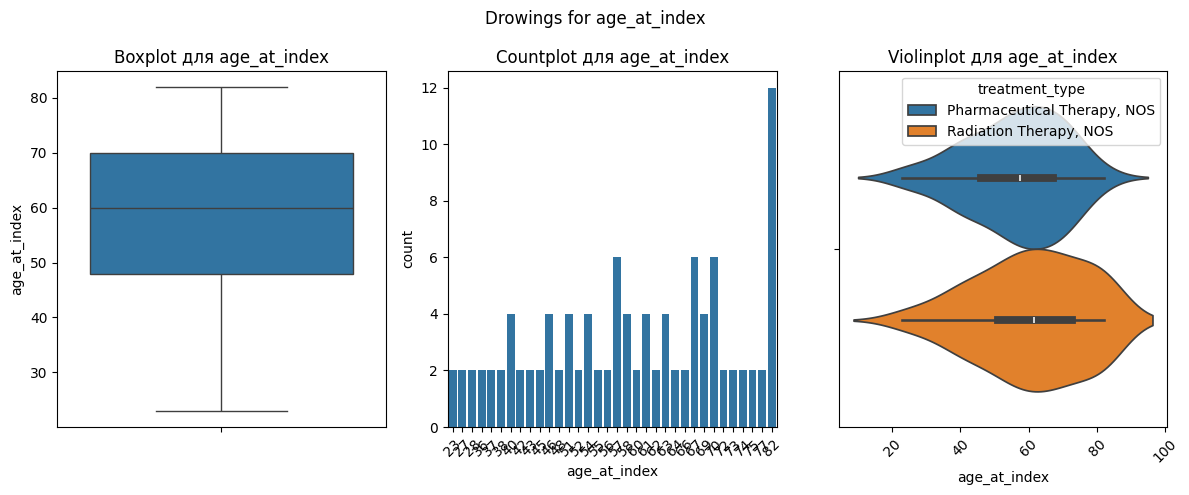

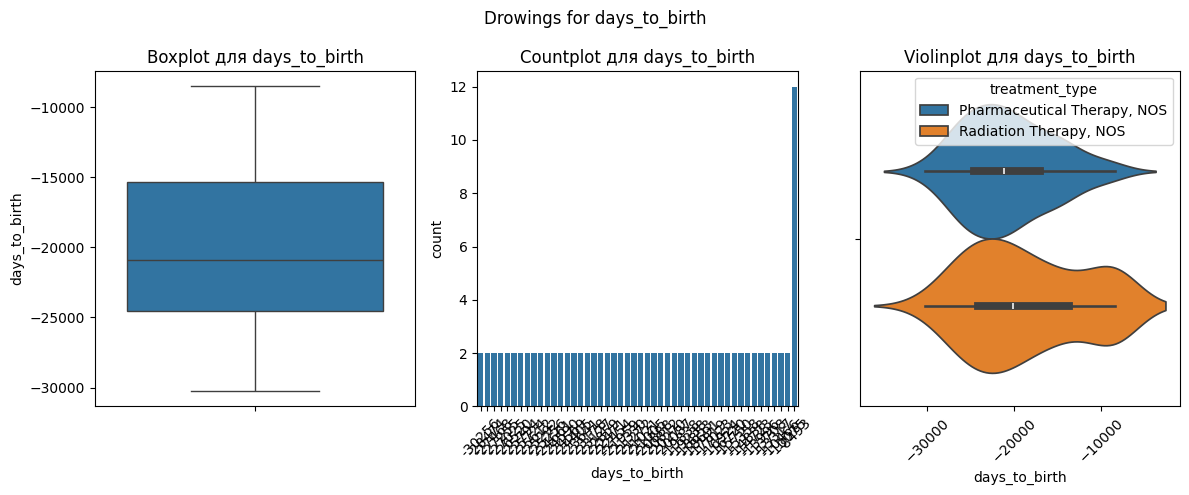

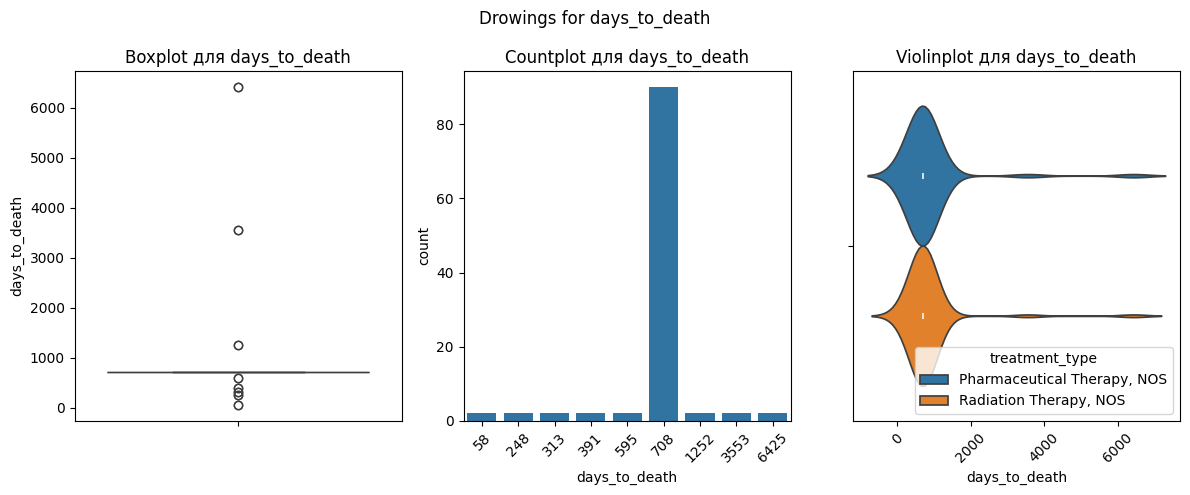

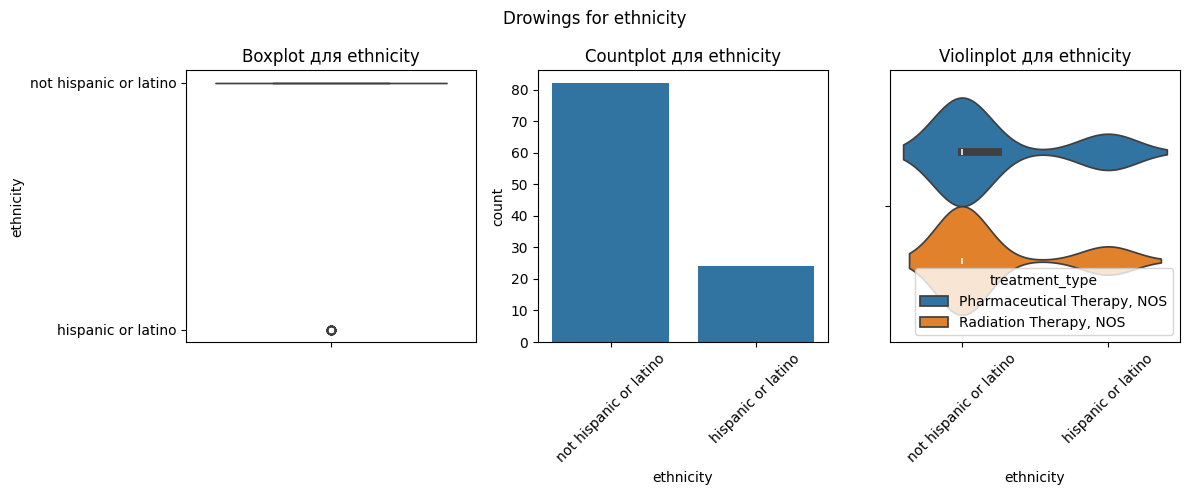

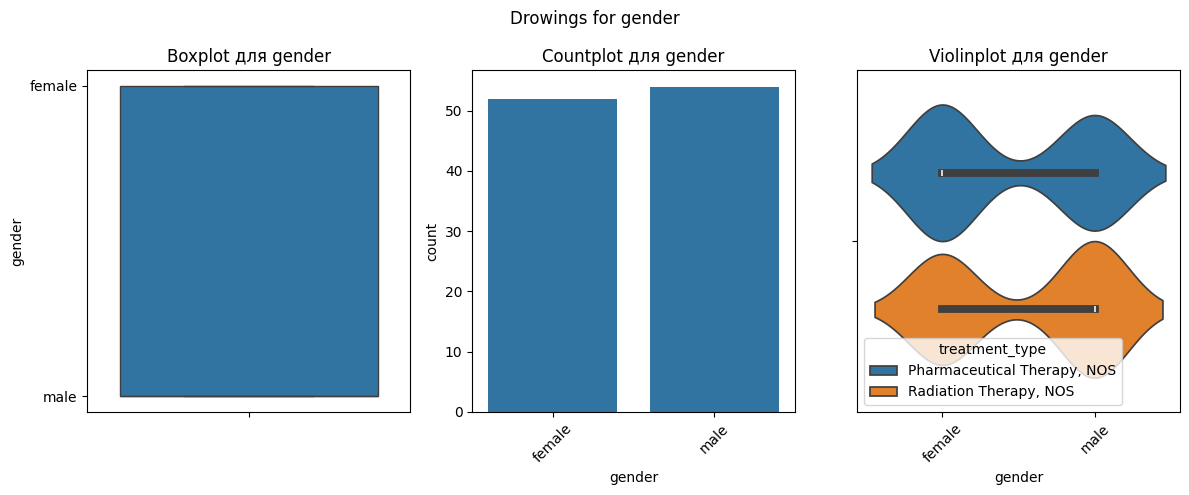

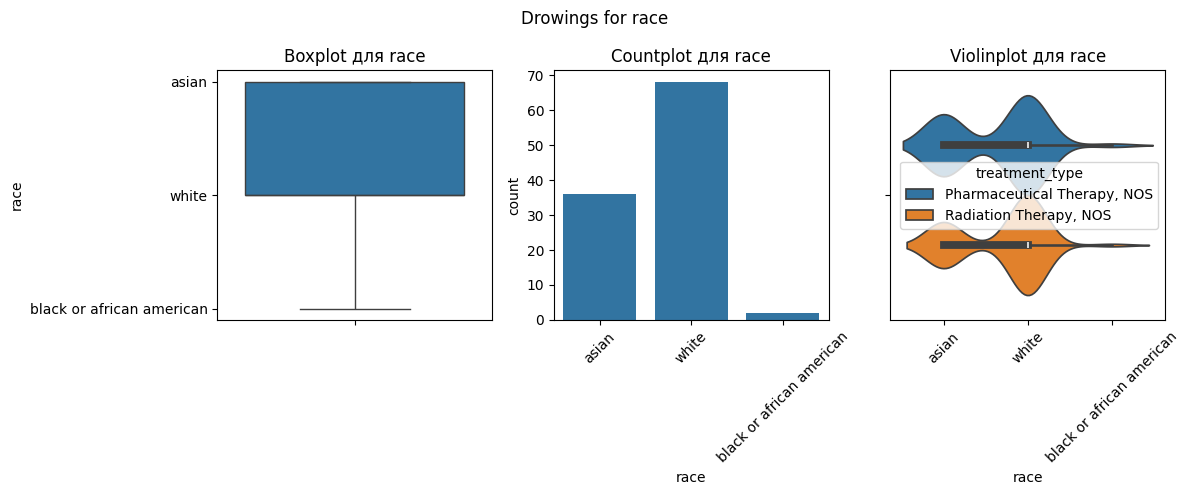

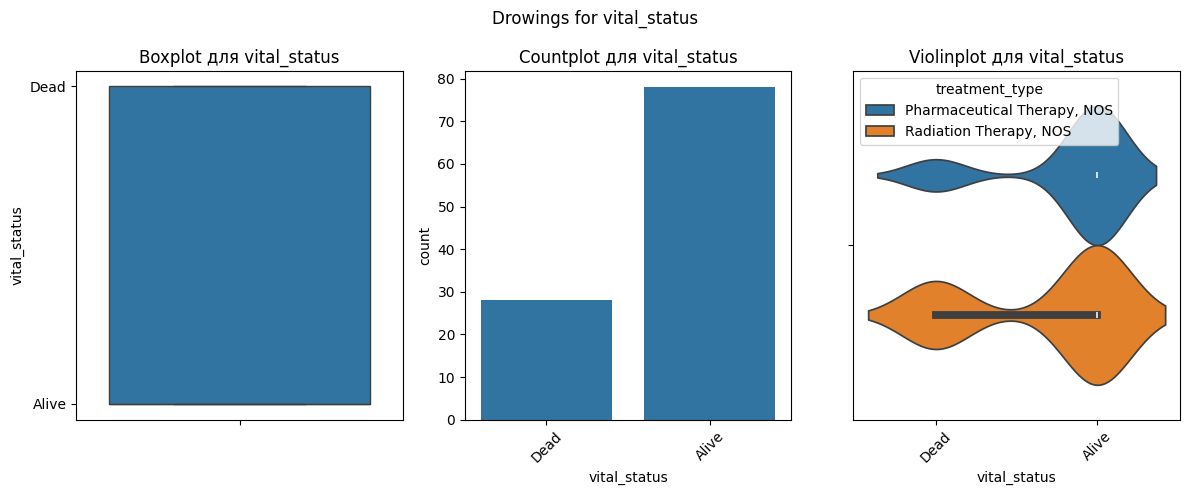

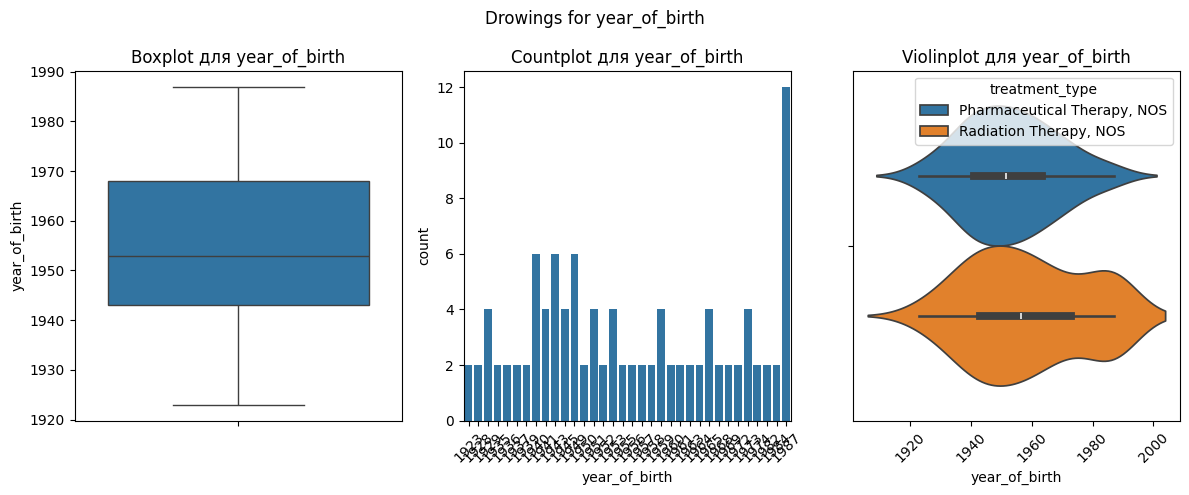

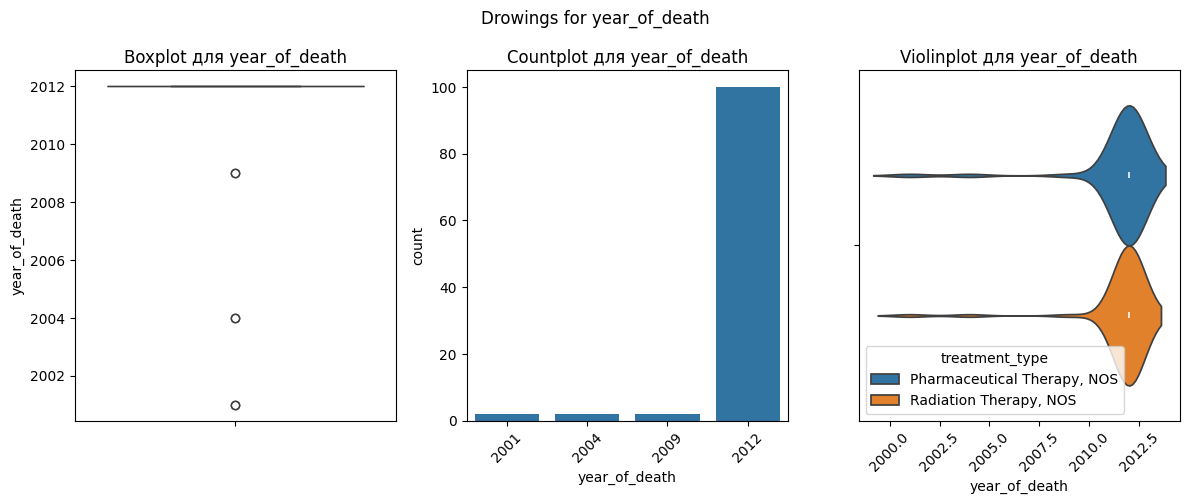

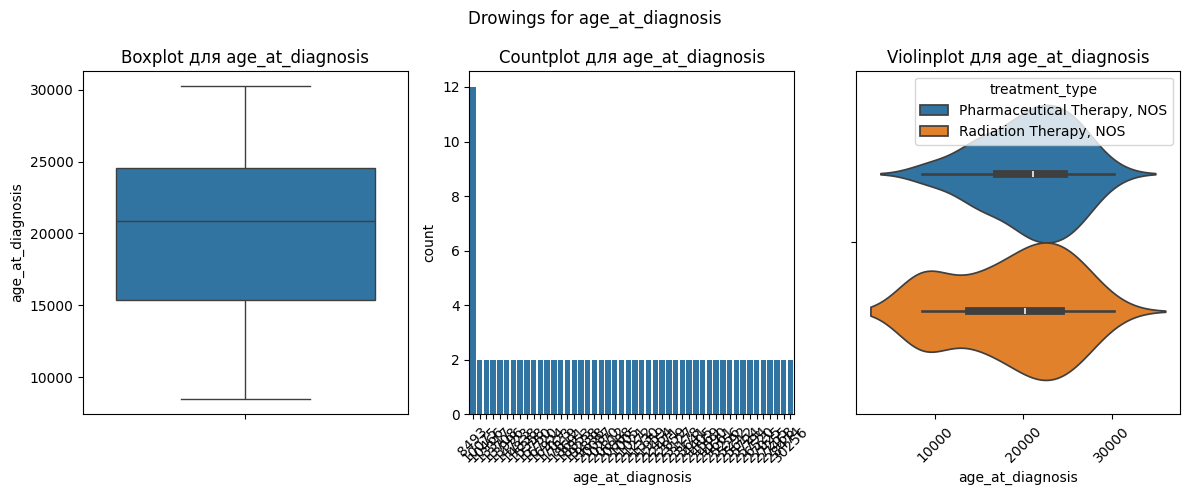

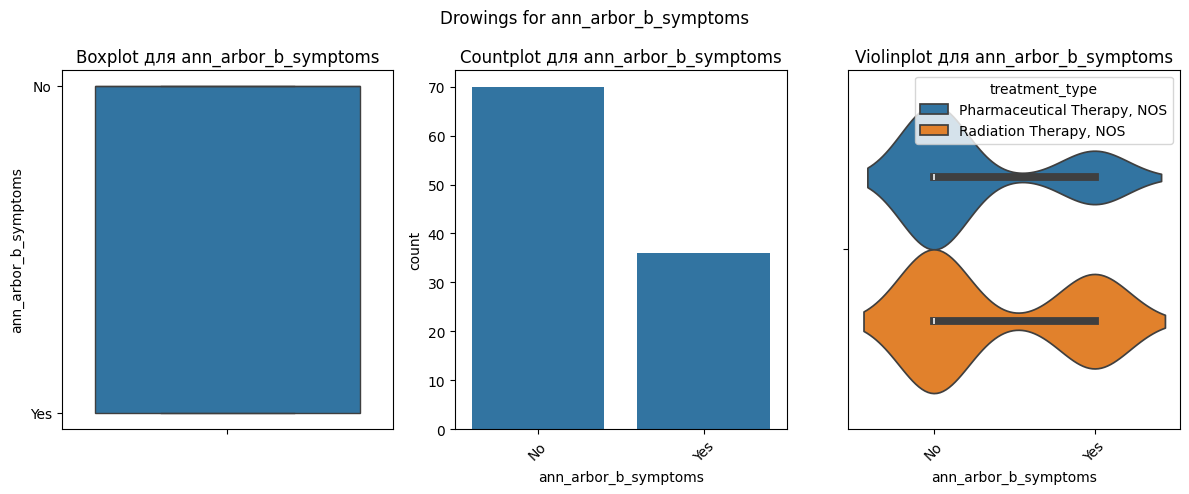

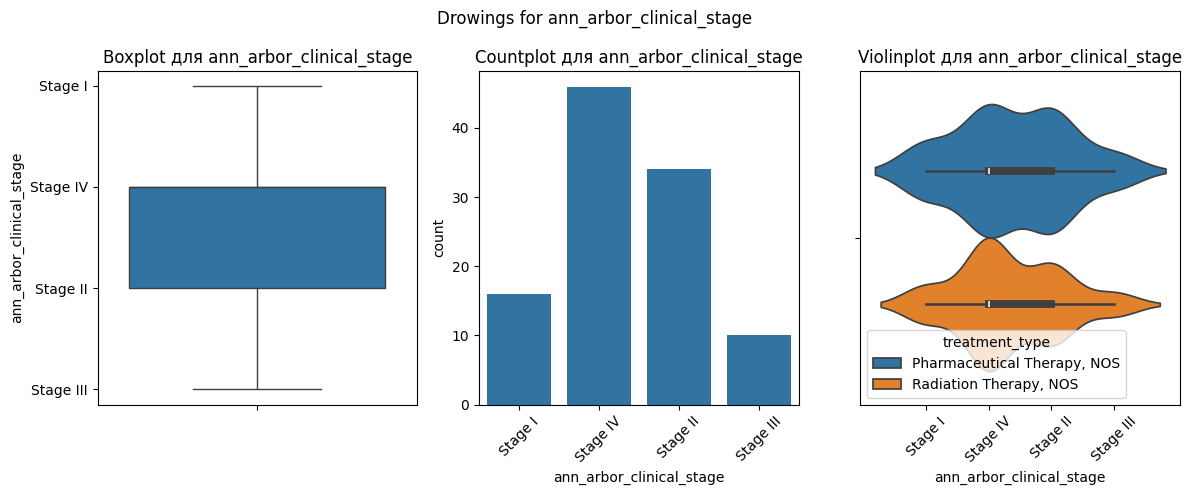

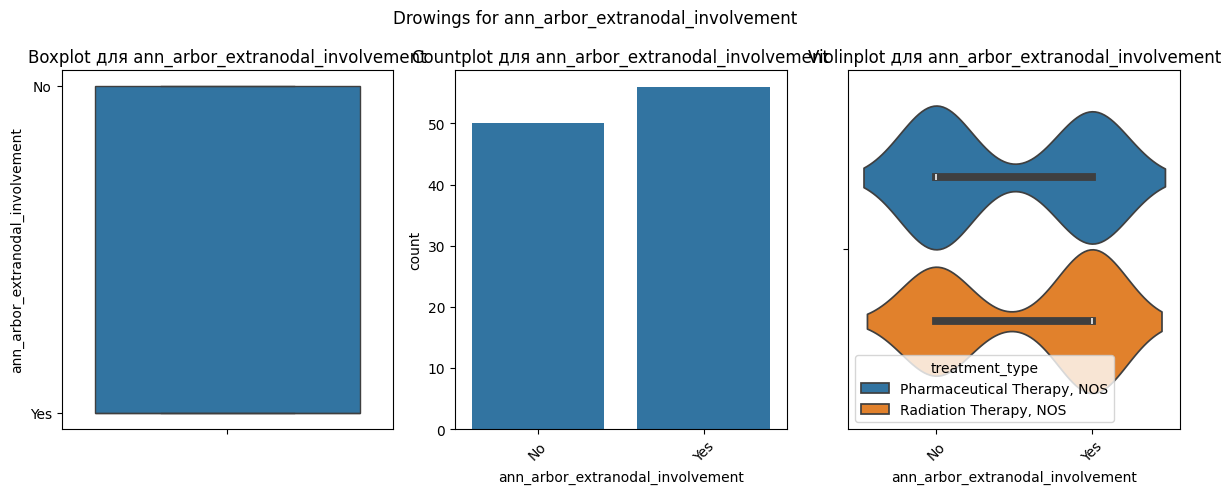

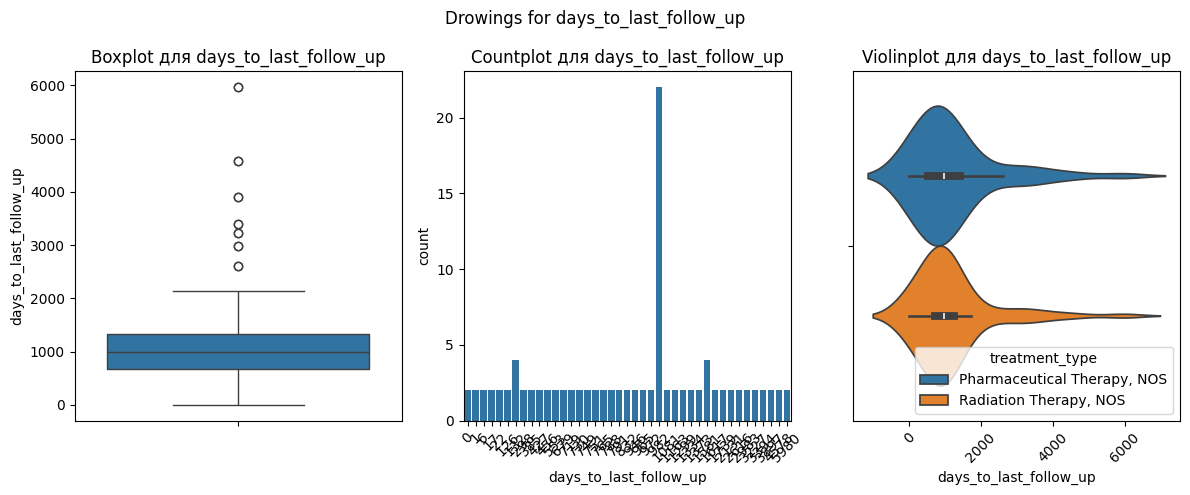

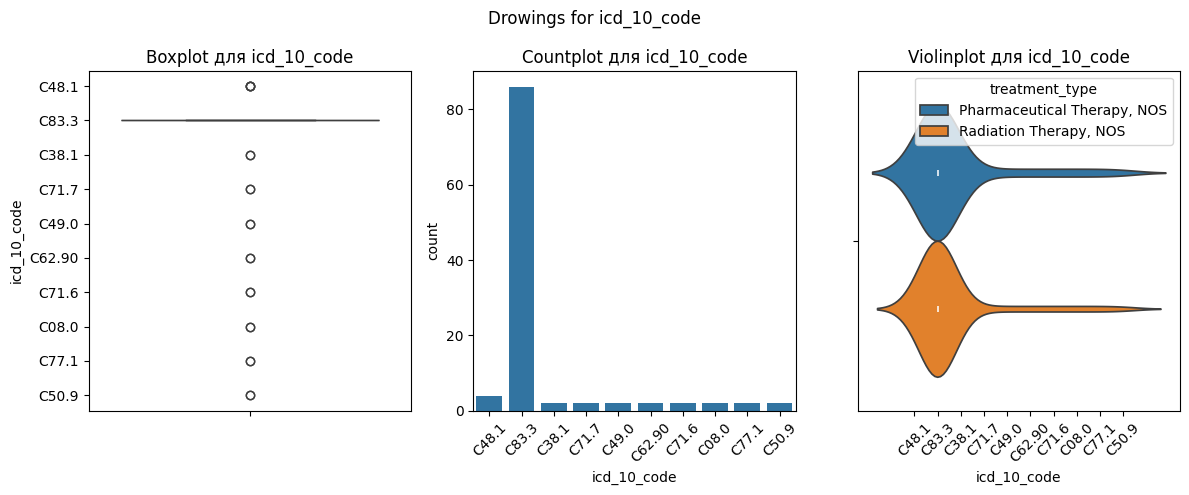

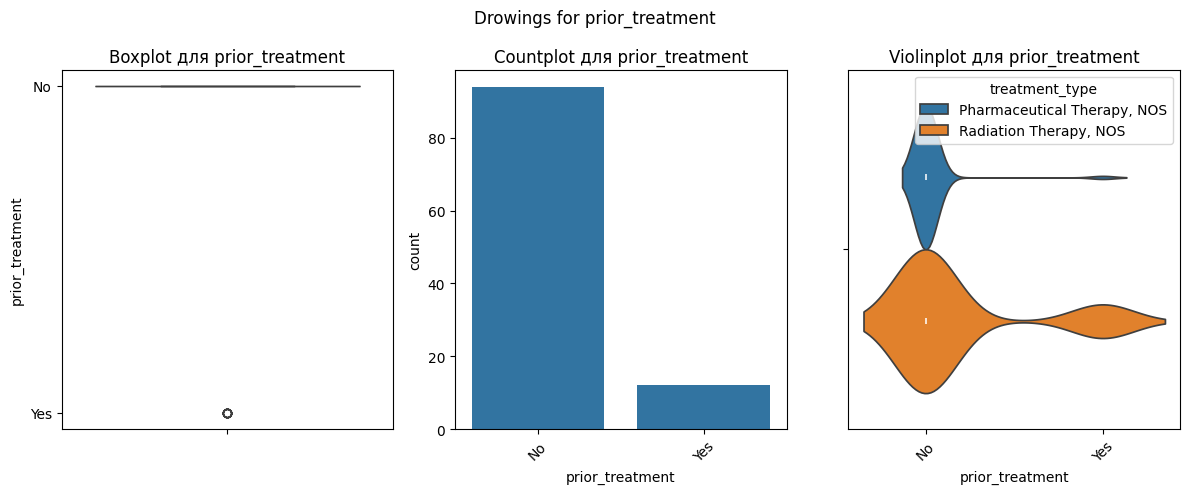

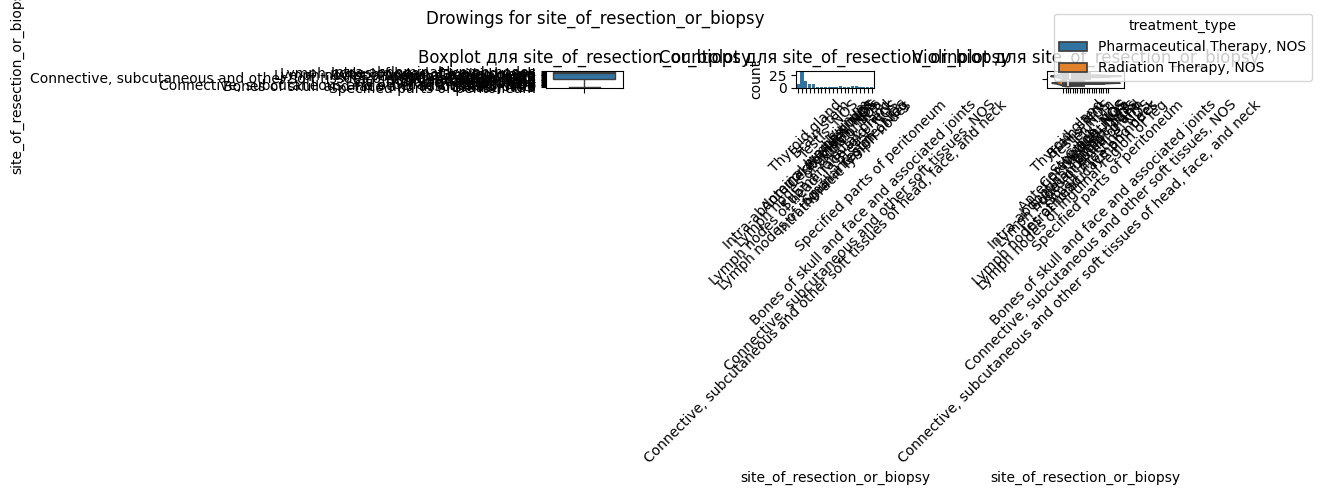

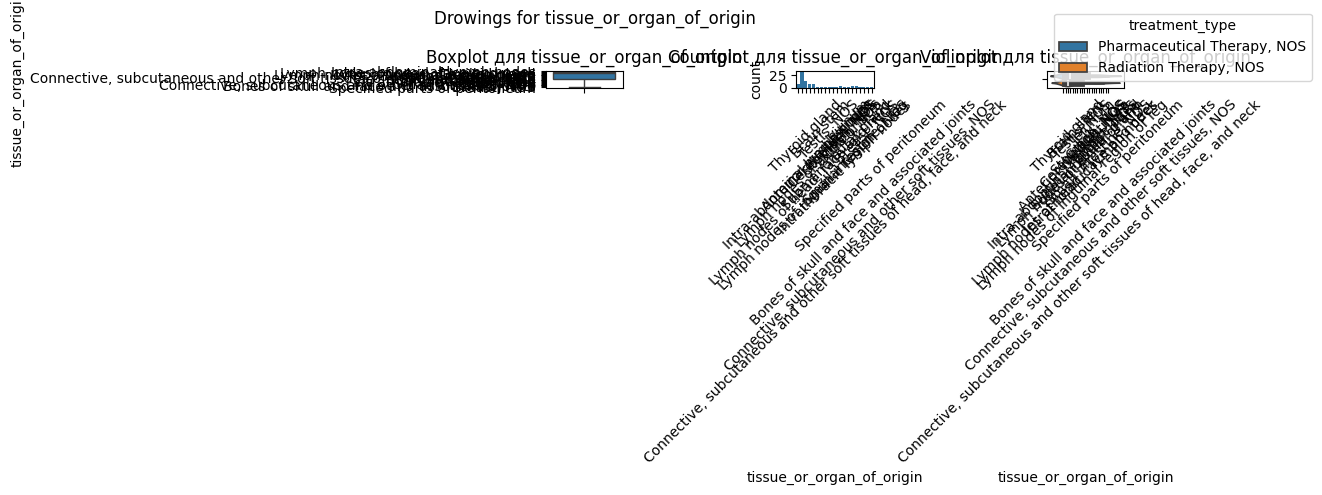

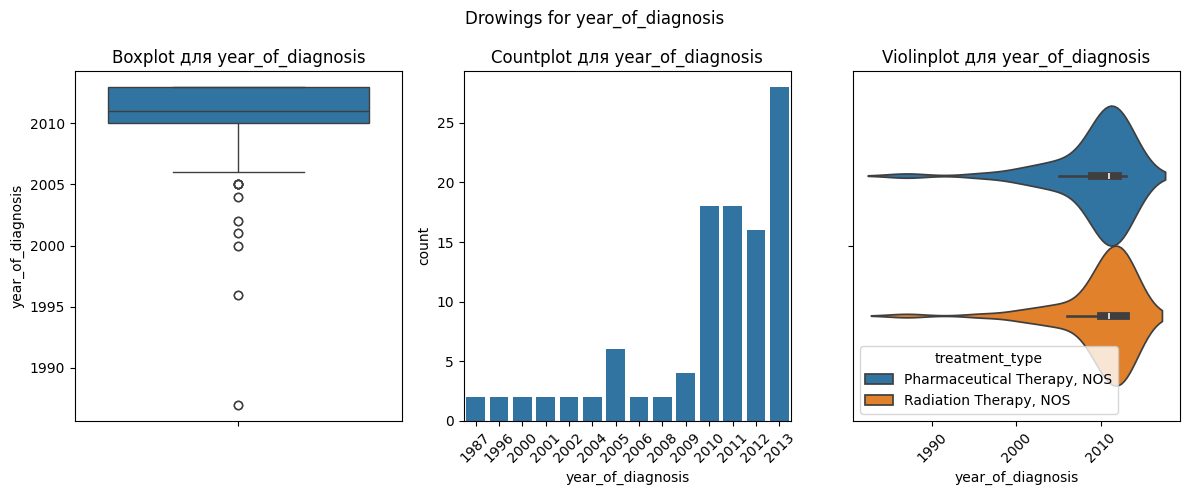

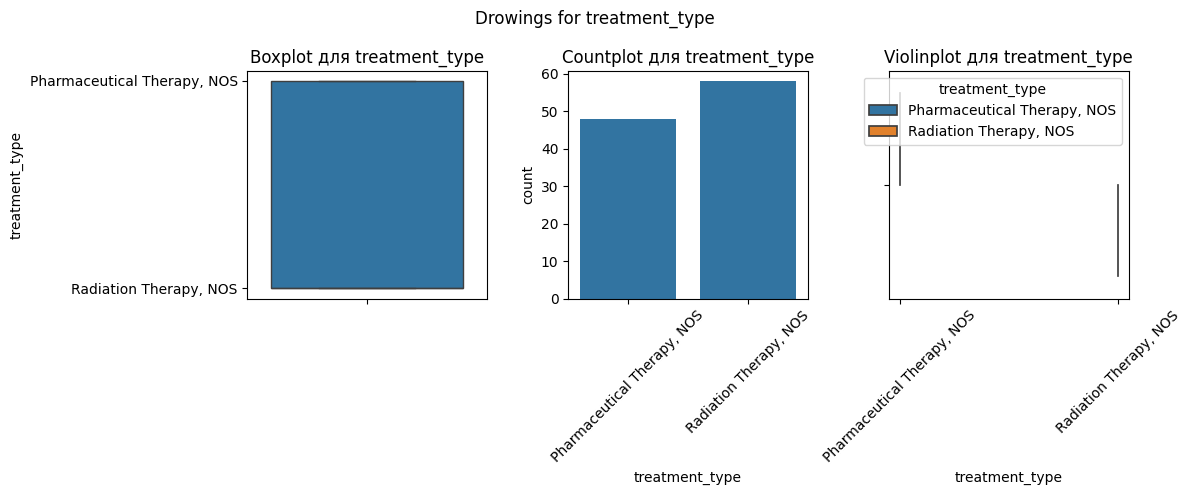

In [306]:
for column in columns:
  fig, axes = plt.subplots(1, 3, figsize=(12, 5))

  sns.boxplot(y=df[column], ax=axes[0])
  axes[0].set_title('Boxplot для '+column)

  sns.countplot(x=df[column], ax=axes[1])
  axes[1].set_title('Countplot для '+column)
  axes[1].tick_params(axis='x', rotation=45)

  sns.violinplot(x=df[column], ax=axes[2], hue=df['treatment_type'])
  axes[2].set_title('Violinplot для '+column)
  axes[2].tick_params(axis='x', rotation=45)

  plt.suptitle(f'Drowings for {column}')
  plt.tight_layout()
  plt.show()

# Для того чтобы выяснить какие признаки больше всего влияют на целевую переменную treatment_type необходимо построить матрицу корреляции. Но для этого необходимо сначала сделать LabelEncoding.

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age_at_index                      106 non-null    int64 
 1   days_to_birth                     106 non-null    int64 
 2   days_to_death                     106 non-null    int64 
 3   ethnicity                         106 non-null    object
 4   gender                            106 non-null    object
 5   race                              106 non-null    object
 6   vital_status                      106 non-null    object
 7   year_of_birth                     106 non-null    int64 
 8   year_of_death                     106 non-null    int64 
 9   age_at_diagnosis                  106 non-null    int64 
 10  ann_arbor_b_symptoms              106 non-null    object
 11  ann_arbor_clinical_stage          106 non-null    object
 12  ann_arbor_extranodal_i

In [308]:
pd.set_option('display.max_columns', None)
df.head()

,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
0,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,2012,22454,No,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,"Pharmaceutical Therapy, NOS"
1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,2012,22454,No,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,"Radiation Therapy, NOS"
2,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,2012,27025,No,Stage IV,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,"Radiation Therapy, NOS"
3,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,2012,27025,No,Stage IV,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,"Pharmaceutical Therapy, NOS"
4,27,-10075,391,hispanic or latino,female,white,Dead,1984,2012,10075,No,Stage II,No,982,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,"Pharmaceutical Therapy, NOS"


In [309]:
int_features=['age_at_index', 'days_to_birth', 'days_to_death', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'days_to_last_follow_up', 'year_of_diagnosis']
for column in int_features:
  df[column]=df[column].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age_at_index                      106 non-null    int64 
 1   days_to_birth                     106 non-null    int64 
 2   days_to_death                     106 non-null    int64 
 3   ethnicity                         106 non-null    object
 4   gender                            106 non-null    object
 5   race                              106 non-null    object
 6   vital_status                      106 non-null    object
 7   year_of_birth                     106 non-null    int64 
 8   year_of_death                     106 non-null    int64 
 9   age_at_diagnosis                  106 non-null    int64 
 10  ann_arbor_b_symptoms              106 non-null    object
 11  ann_arbor_clinical_stage          106 non-null    object
 12  ann_arbor_extranodal_i

In [310]:
df_encoded=df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
  df_encoded[col]=LabelEncoder().fit_transform(df_encoded[col])


df_encoded.head()

,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
0,61,-22454,248,1,0,0,1,1952,2012,22454,0,0,0,22,2,0,8,8,2013,0
1,61,-22454,248,1,0,0,1,1952,2012,22454,0,0,0,22,2,0,8,8,2013,1
2,73,-27025,58,1,1,0,1,1940,2012,27025,0,3,0,6,9,0,12,12,2013,1
3,73,-27025,58,1,1,0,1,1940,2012,27025,0,3,0,6,9,0,12,12,2013,0
4,27,-10075,391,0,0,2,1,1984,2012,10075,0,1,0,982,9,0,12,12,2011,0


In [311]:
correlation_with_target=df_encoded.corr()[['treatment_type']].drop('treatment_type').sort_values(by='treatment_type', ascending=False)
correlation_with_target

,treatment_type
prior_treatment,0.265221
days_to_birth,0.175225
year_of_birth,0.168073
vital_status,0.158163
site_of_resection_or_biopsy,0.147378
tissue_or_organ_of_origin,0.147378
age_at_index,0.145893
ann_arbor_b_symptoms,0.132140
ann_arbor_clinical_stage,0.097935
gender,0.092991


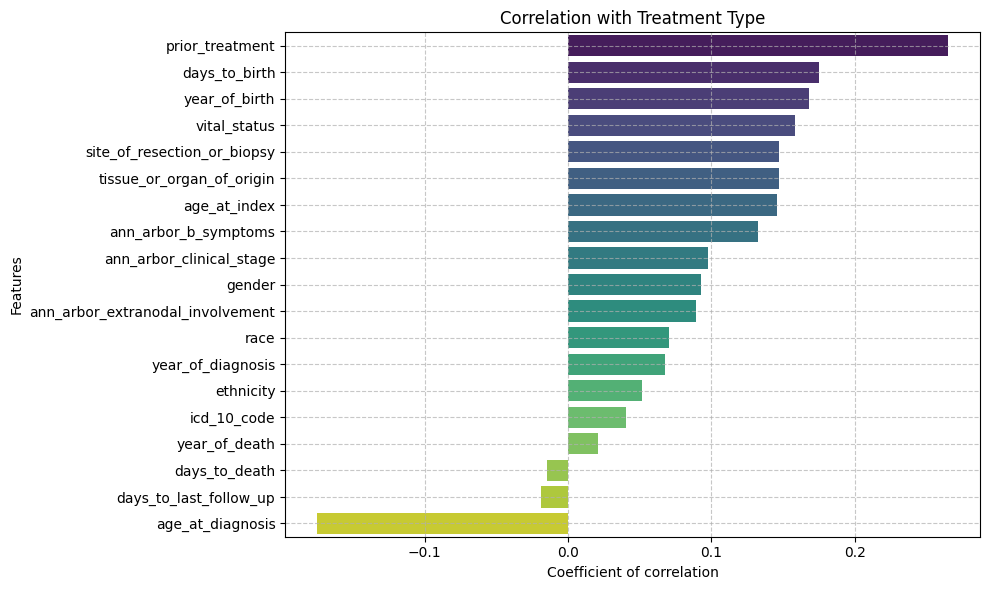

In [312]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.treatment_type, y=correlation_with_target.index, palette='viridis')
plt.xlabel('Coefficient of correlation')
plt.ylabel('Features')
plt.title('Correlation with Treatment Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

1. prior_treatment
Признак указывает, было ли у пациента лечение до текущего диагноза.

Источник:

Медицинские карты (история болезни)

Анкеты пациентов

Электронные истории лечения (EHR/EMR)

Категориальный признак: "yes", "no", "unknown" и т. д.

2. days_to_birth
Количество дней от даты рождения до даты диагностики, в отрицательном значении (по стандарту TCGA, GDC, NCBI). Вычисляется.

Это вспомогательный технический признак, часто встречается в геномных клинических датасетах.

3. year_of_birth
Год рождения пациента (например, 1975)

Источник:

Из date_of_birth

Из анкетных/регистрационных данных

Может использоваться для определения когорты или анализа по возрастным группам.

 4. age_at_diagnosis
Возраст пациента на момент постановки диагноза (в годах). Вычисляется.
Основной количественный признак для анализа риска.

# Общий вывод:
Признак	Источник	Комментарий
prior_treatment	История болезни, анкета	Категориальный, вручную введённый
days_to_birth	Вычислен из даты рождения и диагноза	Стандартизированное представление в GDC
year_of_birth	Из даты рождения	Часто напрямую вводится
age_at_diagnosis	Вычислен на основе days_to_birth	Ключевой числовой показатель возраста


##ОКОНЧАТЕЛЬНЫЙ  ВЫВОД

Больше всего на целевую переменную treatment_type влияют признаки: prior_treatment	0.265221
days_to_birth	0.175225
year_of_birth	0.168073
age_at_diagnosis	-0.175225

Т.е. Чем больше prior_treatment, days_to_birth, year_of_birth тем больше необхоимо проводить Radiation Therapy, NOS.

Чем больше age_at_diagnosis по модулю тем больше необхоимо проводить Radiation Therapy, NOS.